In [1]:
!pip install opendatasets --quiet
import opendatasets as od
od.download('https://www.kaggle.com/datasets/mssmartypants/rice-type-classification')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: prahadeepr
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mssmartypants/rice-type-classification


100%|██████████| 888k/888k [00:00<00:00, 616MB/s]

In [3]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#pytorch cannot automatically detect gpu so we use this
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [5]:
data_df = pd.read_csv('/content/rice-type-classification/riceClassification.csv')
print(data_df.head())

   id  Area  MajorAxisLength  ...  Roundness  AspectRation  Class
0   1  4537        92.229316  ...   0.764510      1.440796      1
1   2  2872        74.691881  ...   0.831658      1.453137      1
2   3  3048        76.293164  ...   0.868434      1.465950      1
3   4  3073        77.033628  ...   0.870203      1.483456      1
4   5  3693        85.124785  ...   0.874743      1.510000      1

[5 rows x 12 columns]


In [6]:
data_df.dropna(inplace=True)
data_df.drop(['id'], axis=1, inplace=True)
print(data_df.shape)


(18185, 11)


In [7]:
data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [8]:
data_df['Class'].unique()

array([1, 0])

In [9]:
print(data_df['Class'].value_counts())

Class
1    9985
0    8200
Name: count, dtype: int64


In [10]:
original_df = data_df.copy()

for column in data_df.columns:
  data_df[column] = data_df[column]/data_df[column].abs().max()

data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [11]:
X = np.array(data_df.iloc[:,:-1])

Y = np.array(data_df.iloc[:, -1])


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [13]:
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(12729, 10)
(2728, 10)
(2728, 10)


In [15]:
#pytorch dataset object

class dataset(Dataset):
  def __init__(self, X, Y):
    self.X = torch.tensor(X, dtype=torch.float32).to(device)
    self.Y = torch.tensor(Y, dtype=torch.float32).to(device)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, index):
    return self.X[index], self.Y[index]



In [16]:
training_data = dataset(X_train, Y_train)
testing_data = dataset(X_test, Y_test)
validation_data = dataset(X_val, Y_val)

In [32]:
train_dataloader = DataLoader(training_data, batch_size=8, shuffle=True)
test_dataloader = DataLoader(testing_data, batch_size=8, shuffle=True)
val_dataloader = DataLoader(validation_data, batch_size=8, shuffle=True)

In [33]:
for x, y in train_dataloader:
  print(x)
  print("=====")
  print(y)
  break

tensor([[0.7291, 0.9591, 0.6680, 0.9821, 0.7061, 0.8539, 0.6361, 0.7720, 0.6710,
         0.8146],
        [0.5357, 0.7517, 0.6227, 0.9596, 0.5111, 0.7319, 0.6565, 0.6189, 0.7670,
         0.6848],
        [0.7966, 0.8195, 0.8451, 0.9159, 0.7594, 0.8925, 0.6997, 0.7069, 0.8741,
         0.5501],
        [0.7337, 0.8093, 0.7868, 0.9298, 0.6995, 0.8566, 0.6958, 0.6874, 0.8516,
         0.5836],
        [0.5938, 0.7950, 0.6538, 0.9607, 0.5615, 0.7706, 0.9443, 0.6475, 0.7767,
         0.6899],
        [0.5961, 0.8040, 0.6456, 0.9643, 0.5693, 0.7721, 0.6821, 0.6745, 0.7185,
         0.7066],
        [0.8407, 0.8890, 0.8227, 0.9402, 0.8051, 0.9169, 0.7019, 0.7543, 0.8104,
         0.6131],
        [0.5919, 0.8394, 0.6178, 0.9758, 0.5659, 0.7693, 0.5631, 0.6732, 0.7162,
         0.7709]], device='cuda:0')
=====
tensor([1., 1., 0., 0., 1., 1., 0., 1.], device='cuda:0')


In [34]:
HIDDEN_NEURONS = 10

class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()

    self.input_layer = nn.Linear(X.shape[1], HIDDEN_NEURONS)
    self.linear = nn.Linear(HIDDEN_NEURONS, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.input_layer(x)
    x = self.linear(x)
    x = self.sigmoid(x)
    return x

model = MyModel().to(device)

In [35]:
summary(model, (X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [36]:
#loss function

criterion = nn.BCELoss()

optimizer = Adam(model.parameters(), lr = 1e-3)

In [38]:
#training

epochs = 10

total_loss_train_plot = []
total_loss_val_plot = []
total_acc_train_plot = []
total_acc_val_plot = []

for epoch in range(epochs):
  total_acc_train = 0
  total_loss_train = 0
  total_acc_val = 0
  total_loss_val = 0

  for data in train_dataloader:
    inputs, labels = data
    prediction = model(inputs).squeeze(1)

    batch_loss = criterion(prediction, labels)
    total_loss_train += batch_loss.item()

    acc = ((prediction).round() == labels).sum().item()
    total_acc_train += acc

    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  with torch.no_grad():
    for data in val_dataloader:
      inputs, labels = data

      prediction = model(inputs).squeeze(1)

      batch_loss = criterion(prediction, labels)
      total_loss_val += batch_loss.item()

      acc = ((prediction).round() == labels).sum().item()
      total_acc_val += acc

  total_loss_train_plot.append(round(total_loss_train/1000, 4))
  total_loss_val_plot.append(round(total_loss_val/1000, 4))
  total_acc_train_plot.append(round(total_acc_train/training_data.__len__() * 100, 4))
  total_acc_val_plot.append(round(total_acc_val/validation_data.__len__() * 100, 4))

  print(f"Epoch: {epoch+1} Train Loss: {total_loss_train_plot[-1]} Train Acc: {total_acc_train_plot[-1]} Val Loss: {total_loss_val_plot[-1]} Val Acc: {total_acc_val_plot[-1]}")
  print("="*65)

Epoch: 1 Train Loss: 0.0673 Train Acc: 98.6723 Val Loss: 0.0127 Val Acc: 98.9003
Epoch: 2 Train Loss: 0.0669 Train Acc: 98.5859 Val Loss: 0.0123 Val Acc: 98.937
Epoch: 3 Train Loss: 0.0675 Train Acc: 98.6095 Val Loss: 0.0129 Val Acc: 98.6804
Epoch: 4 Train Loss: 0.0676 Train Acc: 98.5231 Val Loss: 0.0122 Val Acc: 98.937
Epoch: 5 Train Loss: 0.0663 Train Acc: 98.6802 Val Loss: 0.0172 Val Acc: 97.9106
Epoch: 6 Train Loss: 0.0669 Train Acc: 98.6409 Val Loss: 0.0124 Val Acc: 98.7537
Epoch: 7 Train Loss: 0.0661 Train Acc: 98.633 Val Loss: 0.0126 Val Acc: 98.6804
Epoch: 8 Train Loss: 0.0673 Train Acc: 98.5702 Val Loss: 0.0124 Val Acc: 98.7537
Epoch: 9 Train Loss: 0.0673 Train Acc: 98.5859 Val Loss: 0.0129 Val Acc: 98.827
Epoch: 10 Train Loss: 0.0657 Train Acc: 98.5309 Val Loss: 0.0133 Val Acc: 98.827


In [40]:
#testing

with torch.no_grad():
  total_loss_test = 0
  total_acc_test = 0

  for data in test_dataloader:
    inputs, labels = data

    prediction = model(inputs).squeeze(1)

    batch_loss_test = criterion(prediction, labels).item()
    total_loss_test += batch_loss_test

    acc_test = ((prediction).round() == labels).sum().item()
    total_acc_test += acc_test

  print(f"Test Loss: {round(total_loss_test/testing_data.__len__(), 4)} Test Acc: {round(total_acc_test/testing_data.__len__() * 100, 4)}")

Test Loss: 0.006 Test Acc: 98.2771


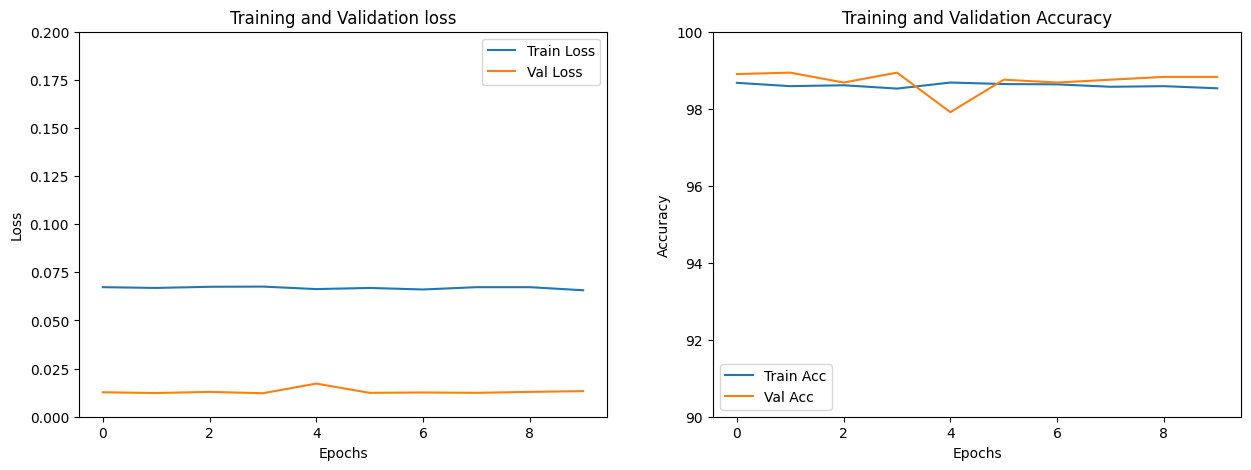

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(total_loss_train_plot, label="Train Loss")
axs[0].plot(total_loss_val_plot, label="Val Loss")
axs[0].set_title("Training and Validation loss")
axs[0].set_ylim(0, 0.2)
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(total_acc_train_plot, label="Train Acc")
axs[1].plot(total_acc_val_plot, label="Val Acc")
axs[1].set_title("Training and Validation Accuracy")
axs[1].set_ylim(90, 100)
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].legend()

plt.show()